# USA.gov data from Bitly

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%config InlineBackend.figure_format ='retina'

In [25]:
path = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/bitly_usagov/example.txt'
df = pd.read_json(path, lines=True)
df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


Let's plot the most occuring time-zones.

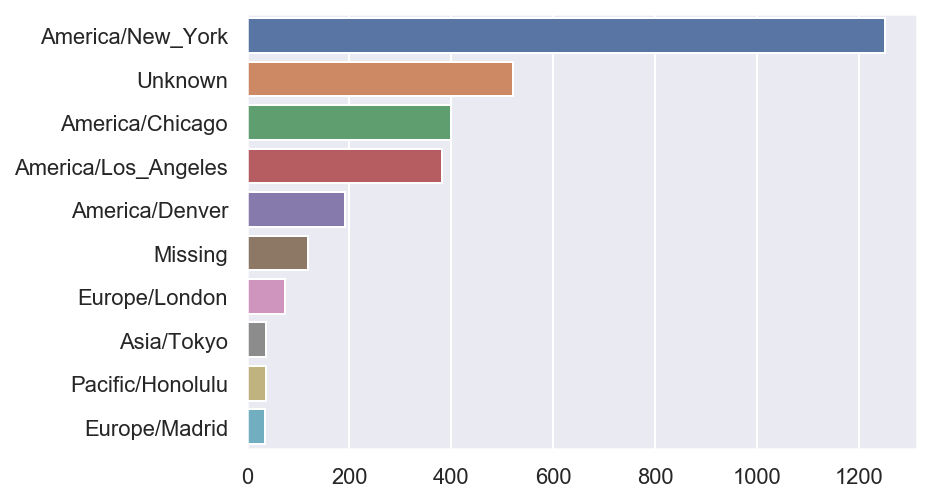

In [28]:
counts = df.tz.str.replace('^$', 'Unknown').fillna('Missing').value_counts()[:10]
sns.barplot(counts.values, counts.index);

Now, let's split the bars by operating system.

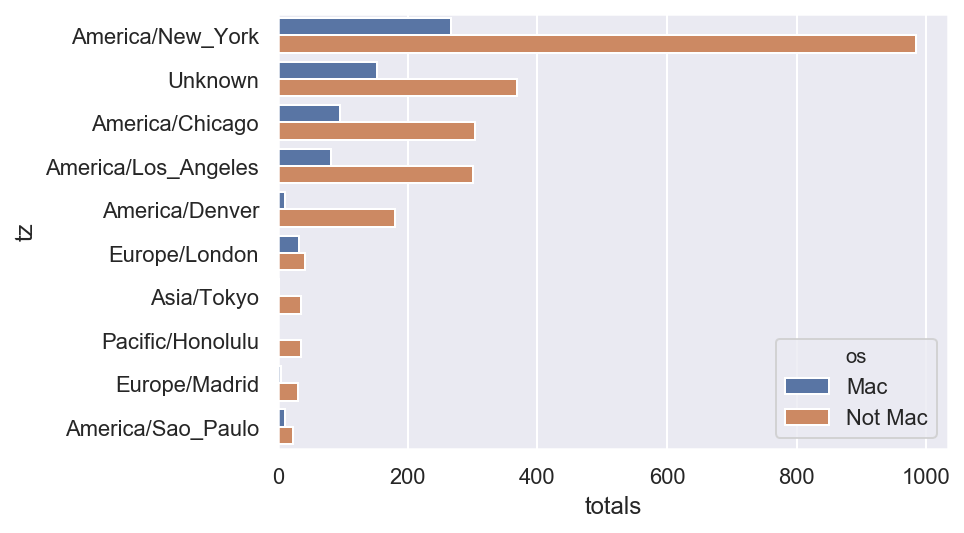

In [54]:
pd.Series.reverse = lambda self: self[::-1]  # Cool trick from here: https://stackoverflow.com/a/46624694

df['os'] = np.where(df.a.str.contains('Mac'), 'Mac', 'Not Mac')

agg_counts = (df.replace('^$', 'Unknown', regex=True)
              .groupby(['tz', 'os'])
              .size()
              .unstack()
              .fillna(0))

indexer = agg_counts.sum(1).argsort()
data = agg_counts.take(indexer[-10:]).reverse().stack()
data.name = 'totals'
data = data.reset_index()

sns.barplot(x='totals', y='tz', hue='os', data=data);

# MovieLens 1M dataset 

In [2]:
!ls data/ml-1m

README      movies.dat  ratings.dat users.dat


In [3]:
import pandas as pd

In [4]:
path = 'data/ml-1m/'

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(path + 'users.dat', sep='::', engine='python', names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(path + 'ratings.dat', sep='::', engine='python', names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(path + 'movies.dat', sep='::', engine='python', names=mnames)

data = pd.merge(pd.merge(users, ratings), movies)
data.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


Calculate average ratings by gender

In [107]:
mean_ratings = data.pivot_table(values='rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


Keep only movies with at least 200 ratings

In [108]:
ratings_count = data.groupby('title').size()
active_titles = ratings_count[ratings_count > 200].index

mean_ratings = mean_ratings.loc[active_titles]
# mean_ratings = mean_ratings.reindex(active_titles)  # alternative

Above was mainly to practice, what I actually want is to exclude movies with fewer than 200 ratings from the very start

In [109]:
rating_count = data.groupby('title').size()
active_movies = rating_count[rating_count > 200].index
data = data[data.title.isin(active_movies)]
data.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


Calculate ratings difference by gender (again, just for fun, and to compare to above result)

In [114]:
mean_ratings2 = data.pivot_table('rating', 'title', 'gender', 'mean')
all(mean_ratings2 == mean_ratings)

True

Look at top movis by gender

In [126]:
mean_ratings.sort_values('F', ascending=False).head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
"General, The (1927)",4.575758,4.329480
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075


In [127]:
mean_ratings.sort_values('M', ascending=False).head()

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248


Calculate rating differences

In [131]:
mean_ratings['diff'] = np.abs(mean_ratings['F'] - mean_ratings['M'])
mean_ratings.sort_values('diff', ascending=False).head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",3.486842,2.795276,0.691567
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359


Find movies with the most rating disagreement among all viwers

In [137]:
data.groupby('title').rating.std().sort_values(ascending=False).head()

title
Plan 9 from Outer Space (1958)         1.455998
Texas Chainsaw Massacre, The (1974)    1.332448
Dumb & Dumber (1994)                   1.321333
Blair Witch Project, The (1999)        1.316368
Natural Born Killers (1994)            1.307198
Name: rating, dtype: float64

# Baby names

In [63]:
!head data/names/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [151]:
import re

files = !ls data/names/yob*

pieces = []
columns = ['name', 'sex', 'births']

for file in files:
    frame = pd.read_csv(file, names=columns)
    
    year = int(re.findall('\d+', file)[0])
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [3]:
years = range(1880, 2019)

pieces = []
columns = ['name', 'gender', 'births']

for year in years:
    path = 'data/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)
names.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


Plot number of girls and boys born over time

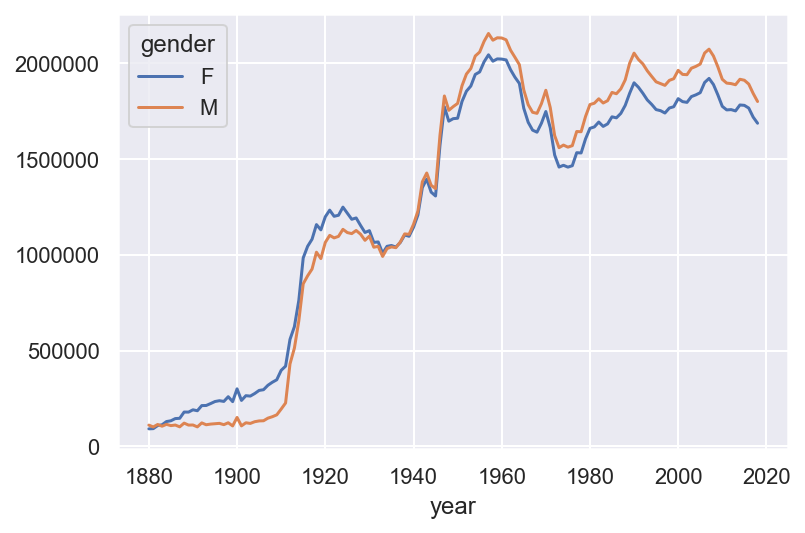

In [4]:
names.pivot_table('births', 'year', 'gender', 'sum').plot();

Add a proportion column

In [5]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['gender', 'year']).apply(add_prop)
names.head()

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


Check that prop sums to 1 for each year-gender group

In [6]:
names.groupby(['gender', 'year']).prop.sum()

gender  year
F       1880    1.0
        1881    1.0
        1882    1.0
        1883    1.0
        1884    1.0
               ... 
M       2014    1.0
        2015    1.0
        2016    1.0
        2017    1.0
        2018    1.0
Name: prop, Length: 278, dtype: float64

Keep only top 1000 names per gender and year

In [7]:
def top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

top1000 = names.groupby(['gender', 'year']).apply(top1000).reset_index(drop=True)

Let's look at the number of births per year for common names

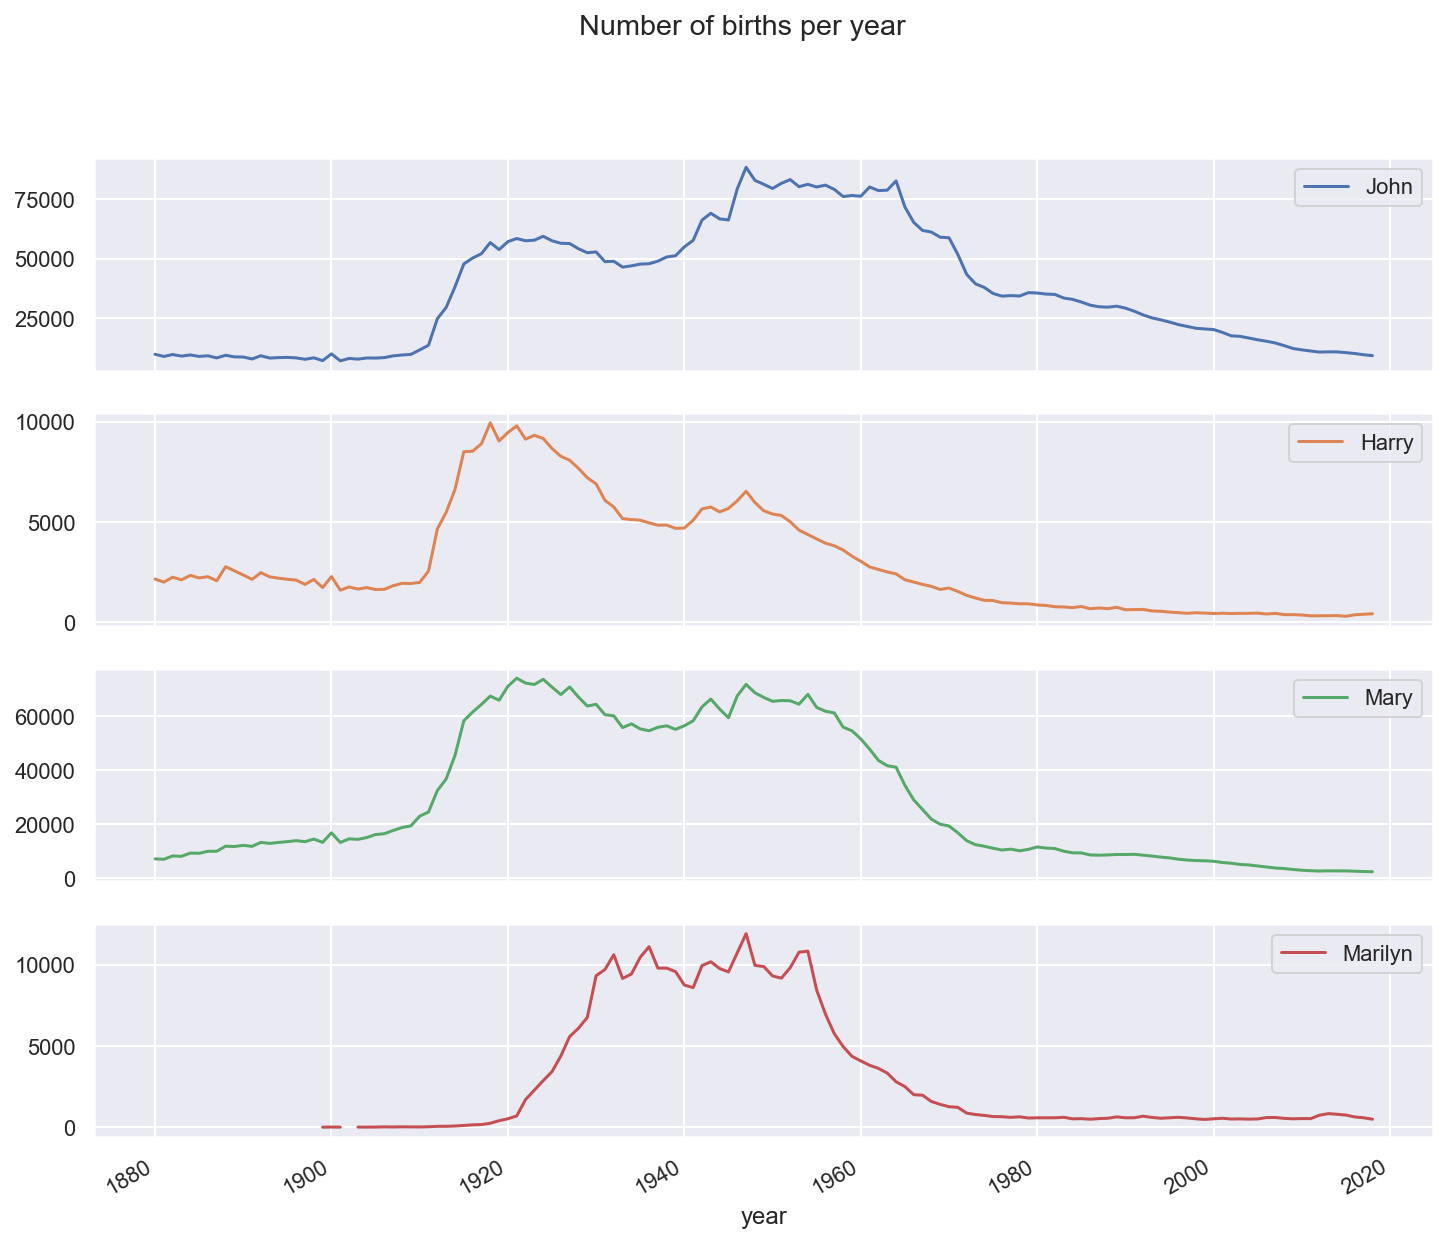

In [8]:
subset = ['John', 'Harry', 'Mary', 'Marilyn']

(names.pivot_table('births', 'year', 'name', 'sum')[subset]
 .plot(subplots=True, figsize=(12,10), title='Number of births per year'));

Plot suggest that common names have become less popular. This could be either because people use other names instead, or becasue people just use more names overall. Let's look into this. First by looking at the proportion of birhts for the top 1000 names.

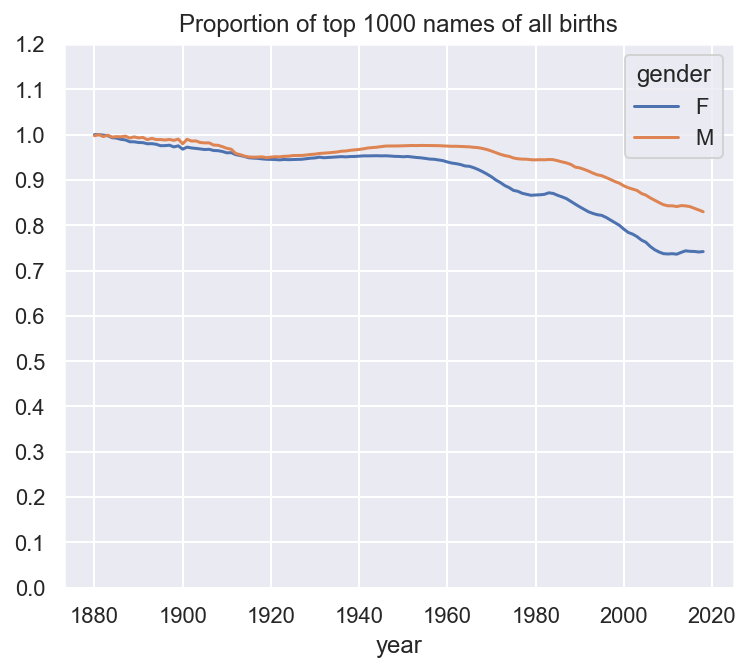

In [9]:
(top1000.pivot_table('prop', 'year', 'gender', 'sum')
 .plot(title='Proportion of top 1000 names of all births',
       figsize=(6, 5),
       yticks=np.linspace(0, 1.2, 13)));

It's clear from the above plot that the top 1000 names are becoming a smaller proportion of all names over time, indicating that naming diversity is increasing. To corroborate this, let's look at the number of names that account for 50 percent of all births in each year for each sex.

In [10]:
boys2018 = top1000[(top1000.year == 2018) & (top1000.gender == 'M')]
boys2018.sort_values('prop', ascending=False).prop.cumsum().searchsorted(.5) + 1

149

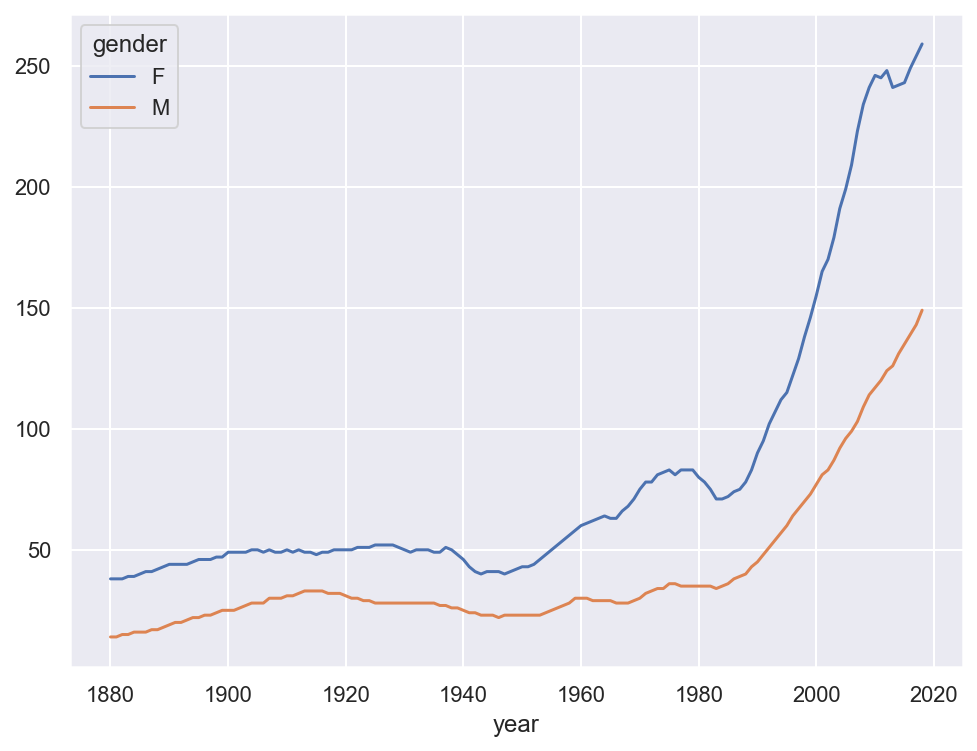

In [11]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values('prop', ascending=False)
    return group.prop.cumsum().searchsorted(.5) + 1

diversity = top1000.groupby(['gender', 'year']).apply(get_quantile_count).unstack(level=0)
diversity.plot(figsize=(8, 6));

Explore the last-letter revolution

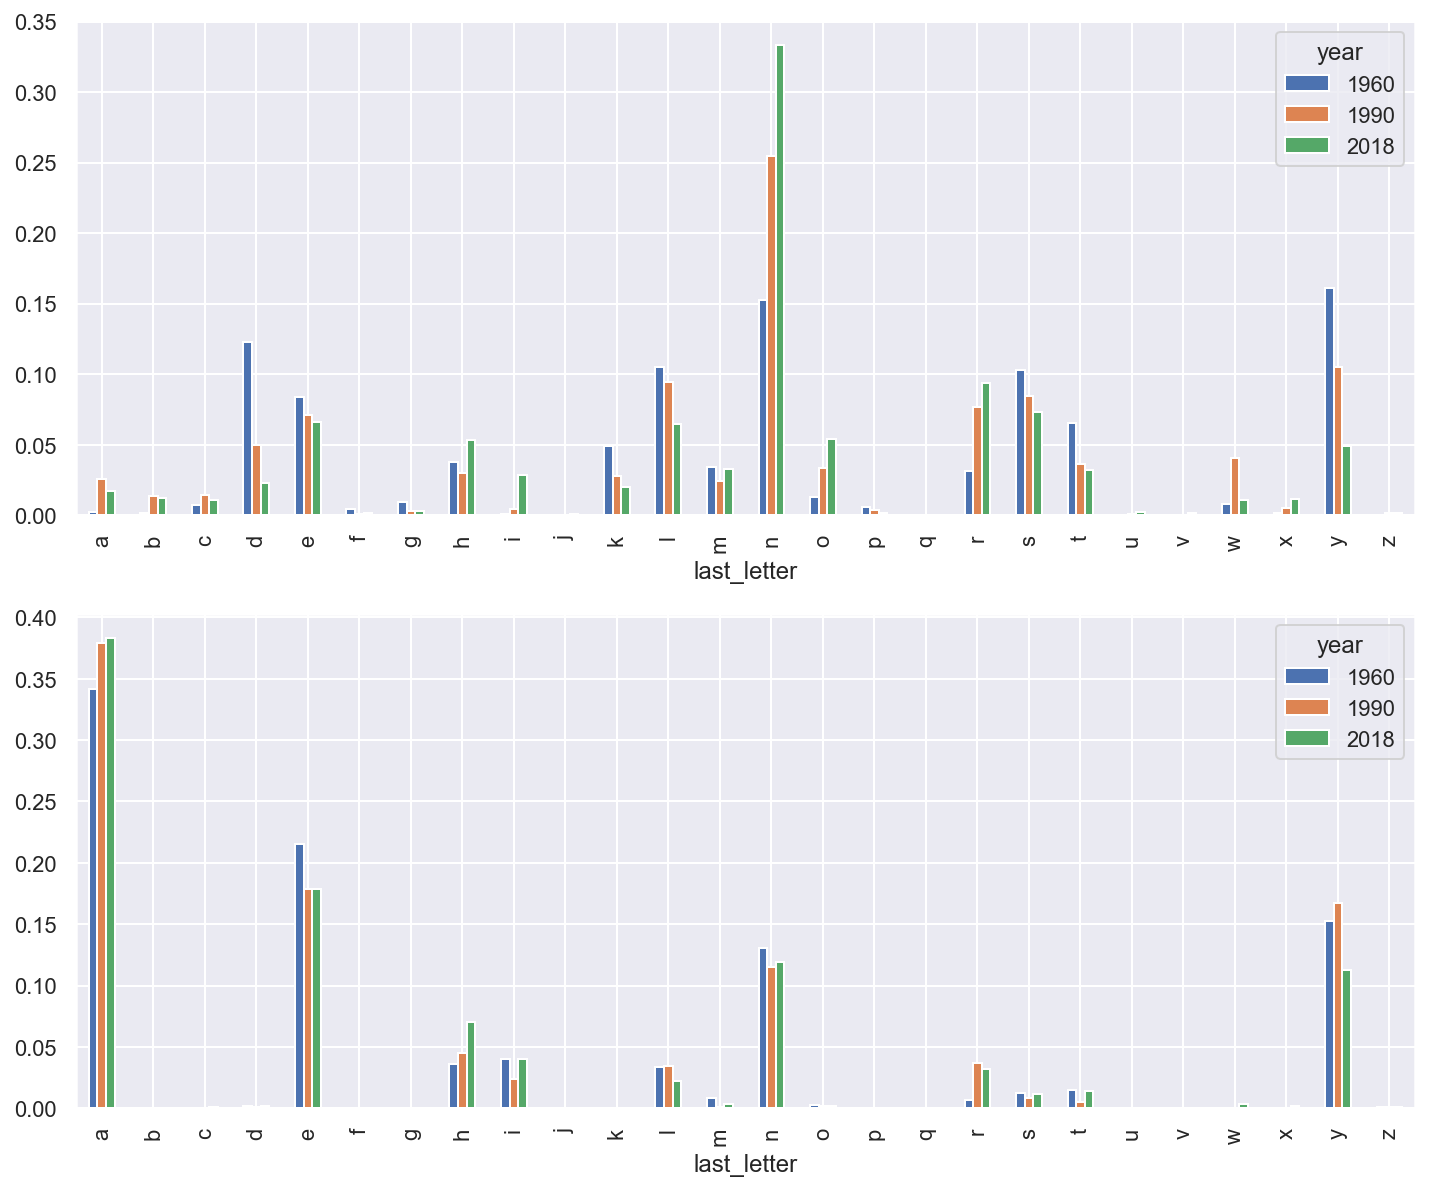

In [202]:
import matplotlib.pyplot as plt

def get_last_letter(name):
    return name[-1]

names['last_letter'] = names.name.map(get_last_letter)

table = names.pivot_table('births', 'last_letter', ['sex', 'year'], 'sum')

subtable = table.reindex(columns=[1960, 1990, 2018], level='year')
subtable = subtable / subtable.sum()
subtable

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

subtable['M'].plot(kind='bar', ax=ax1)
subtable['F'].plot(kind='bar', ax=ax2);

For boys names, d, n, and y have changed markedly in popularity over the past six decads. Let's look at this more closely.

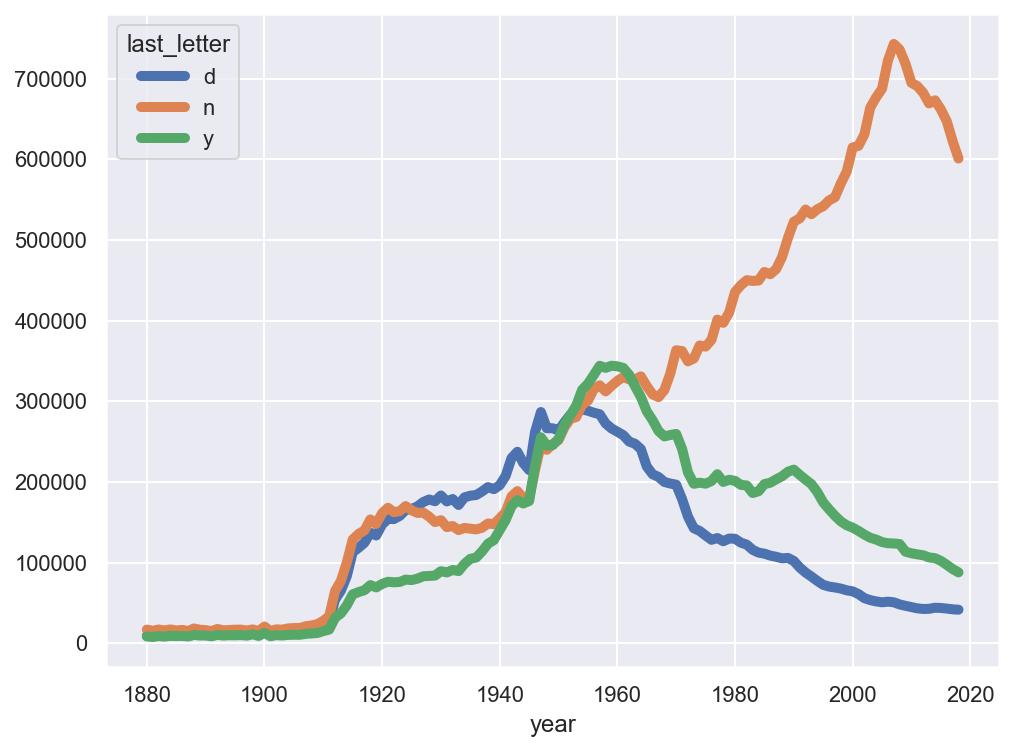

In [210]:
table['M'].reindex(['d', 'n', 'y']).T.plot(figsize=(8, 6), linewidth=5);

Leslie-like names have evolved from being boy to being girl names

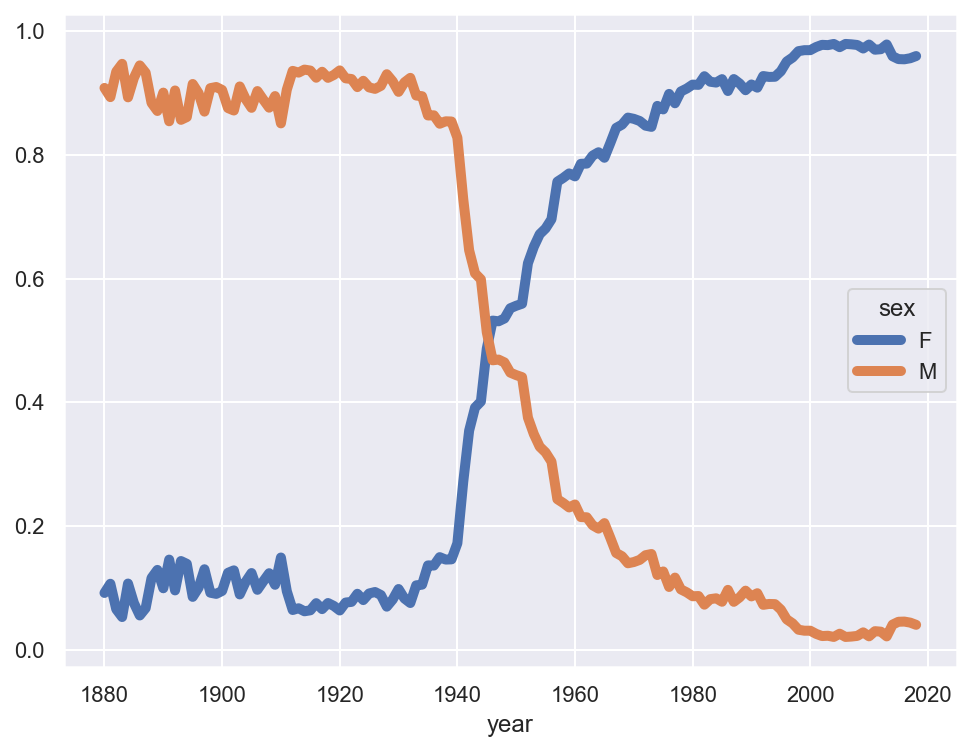

In [258]:
def normalise(df):
    return df.div(df.sum(1), axis='rows')

(names[names.name.str.lower().str.contains('^lesl')]
 .pivot_table('births', 'year', 'sex', 'sum')
 .pipe(normalise)
 .plot(figsize=(8, 6), linewidth=5));

Evolution of Molly and Fabian

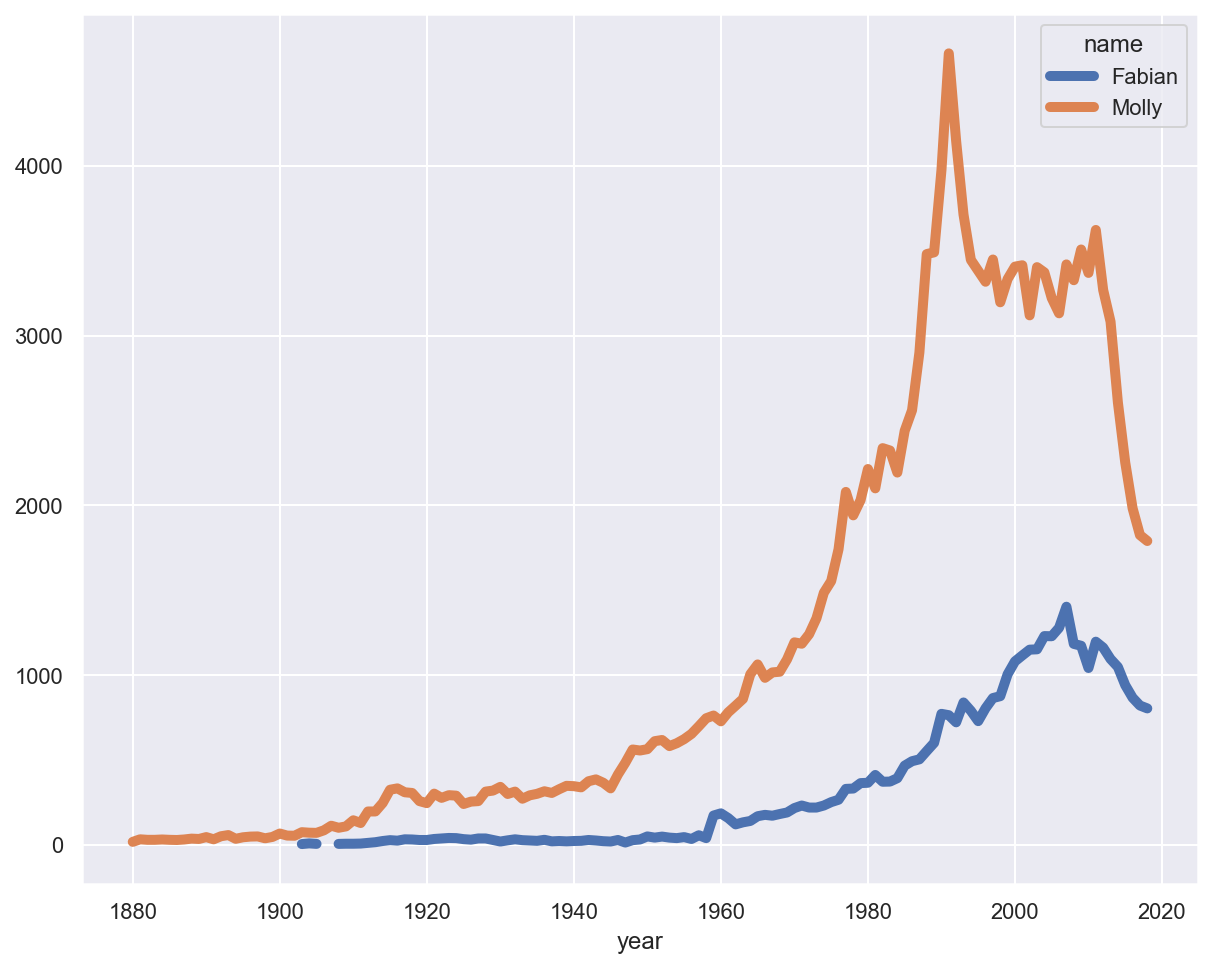

In [221]:
(names[names.name.isin(['Molly', 'Fabian'])]
 .pivot_table('births', 'year', 'name', 'sum')
 .plot(figsize=(10, 8), linewidth=5));